<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h1>Machine Learning </h1> <br> 
<h3>Newborn Weight Analysis</h3><br>
Author: Yeyi Billa

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2> Analysis and Recommendation Summary </h2><br>
<strong>After a meticulous analysis of the data, the following conclusions were derived:</strong><br>
- Daily Consumption of bad substances like cigarettes and alcohol by the mother is more likely to decrease the weight of the baby at birth by <strong>8g</strong>. <br>
- Age is a significant factor affecting the weight of the baby. The older the parents, especially the mother, the less fertile she gets and the more the newborn weight is negatively affected. We have a proportion of <strong>0.23g</strong> of weight lost per year of age after 35 years old.<br>
- Nonetheless, some factors positively impact the weight of the newborn like the level of education of parents with an influence of <strong>+1.35g</strong> as the years of studies increases. It is presume that parents who studied more have deeper knowledge of the human body and how to behave to get the baby born healthy, going from the diet to medical care. <br> As far as medical care is concerned, the last factor in the prediction, prenatal care which is a combination of the prenatal visits and the month where the visits started, has a positive impact on the weight of the newborn with <strong>+2.8g</strong> in more for high frequencies of visits and the sooner they start.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Exploring and Understanding the data</h2> 

In [1]:
#Importing packages pandas, matplotlib.pyplot, seaborn, numpy, statsmodels
#sklearn.linear_model, train_test_split, LinearRegression, KNeighborsRegressor and StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statsmodels.formula.api as smf 
import sklearn.linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler

#Importing excel file as a Dataframe 
file = "./birthweight_low.xlsx"

birthweight = pd.read_excel(io = file,
                           sheet_name = 0,
                           header = 0,
                           na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND',
                                        '-1.#QNAN', '-NaN', '-nan',
        '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a',
        'nan', 'null', ' ?'])

print(birthweight.head(n=5)) #displaying the dataframe


   mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  male  \
0    69    NaN       5    2.0    62    NaN      4      7    23      9     1   
1    68   12.0       3   10.0    61   11.0      4      6    25     11     1   
2    71   12.0       3    6.0    46   12.0      2      7    21     12     1   
3    59   16.0       1    8.0    48   16.0      7      8    21     10     0   
4    48   12.0       4    6.0    39   12.0      2      9    17     13     0   

   mwhte  mblck  moth  fwhte  fblck  foth  bwght  
0      0      1     0      0      1     0    697  
1      1      0     0      1      0     0   1290  
2      0      1     0      0      1     0   1490  
3      0      0     1      0      0     1   1720  
4      1      0     0      1      0     0   1956  


<h3>Understanding of the features</h3><br>
    Here is an explanation behind each features name:<br>
- Age of the parents: mage and fage<br> 
- Month when the prenatal visits begin: monpre<br> 
- number of prenatal visits: npvis<br>
- Level of Education of the parents: meduc and feduc<br>
- Mother's cigarettes intake: cigs<br>
- Mother's alcohol intake: drink<br>
- Parents' race: mwhte, fwhte, mbclk, fbclk, moth, foth<br>
- Gender of the Child: male<br>


In [2]:
#Displaying the dimensions of the dataframe
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18




<h4>Checking Missing values</h4> 

In [3]:
#Checking is there are missing values in dataframe
birthweight.isnull().any().any()

True

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Dealing with Missing values</h3> 

In [4]:
#Checking how many missing values per feature
birthweight.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

Based on the result below, three (03) columns have missing values:<br>
the mother education (meduc), the father education (feduc) and the number of prenatal visits (npvis). <br>
We will therefore try to input some values so that we don't get errors while running our predictions.

In [5]:
#Checking frequency of missing values per feature
birthweight.isnull().mean().round(decimals = 2)

mage      0.00
meduc     0.02
monpre    0.00
npvis     0.02
fage      0.00
feduc     0.04
omaps     0.00
fmaps     0.00
cigs      0.00
drink     0.00
male      0.00
mwhte     0.00
mblck     0.00
moth      0.00
fwhte     0.00
fblck     0.00
foth      0.00
bwght     0.00
dtype: float64

In [6]:
#Checking the types of the features
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [7]:
#Flagging missing values: Creation of new columns with for loop
for col in birthweight:
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)

In [8]:
#Sum of the missing values into a single new column
birthweight['mv_sum'] = birthweight.iloc[ : , -3: ].sum(axis = 1)

In [9]:
#Checking Number of missing values per feature's unique values
print(f"""

Number of Missing Values per Observation 
----------------------------------------------
{(birthweight['mv_sum'].value_counts(normalize = True,
                                  sort      = True,
                                  ascending = True)*100).sort_index().round(2)}
""")



Number of Missing Values per Observation 
----------------------------------------------
0    94.90
1     3.57
2     1.53
Name: mv_sum, dtype: float64



In [10]:
#Imputing new values to missing ones using the mean or the median 
for col in birthweight:
    if birthweight[col].isnull().sum(axis = 0) > 0:
        mean = birthweight[col].mean()
        median = birthweight[col].median()
        if median > mean: #data skewed if mean is higher than median
            birthweight[col].fillna(value = mean,
                               inplace = True)
        elif mean > median: #data skewed if mean is higher than median
            birthweight[col].fillna(value = median,
                               inplace = True)
        else:
            continue
    elif birthweight[col].isnull().sum(axis = 0) < 0:
        continue
    else:
        continue

In [11]:
#Checking if there are any missing values remaining in the dataframe
print(f"""
Missing values remaining in the dataframe?
-----------------------------------------
{birthweight.isnull().any().any()}
""")


Missing values remaining in the dataframe?
-----------------------------------------
False



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Massaging Data to Optimize Prediction</h3> 

In [12]:
#Crossing columns 

birthweight['cigs*drink'] = birthweight['cigs'] * birthweight['drink']
birthweight['meduc*feduc'] = birthweight['meduc'] * birthweight['feduc']
birthweight['fage*mage'] = birthweight['fage'] * birthweight['mage']
birthweight['m_meduc*m_feduc'] = birthweight['m_meduc'] * birthweight['m_feduc']
birthweight['monpre*npvis'] = birthweight['monpre'] * birthweight['npvis']

#Explanations behind crossing features 
print("""*The choice behind combining cigs and drink is to amplify the effect that such
behavior has on a baby's birthweight. This behavior is called crossfating.\n
*Crossing meduc with feduc, as well as m_meduc with m_feduc amplifies the magnitude 
of effects that educated parents has on a baby's birthweight.
*crossing the month the prenatal care began and the number of prenatal visits can 
enhance the baby's health and birthweight.
""")

*The choice behind combining cigs and drink is to amplify the effect that such
behavior has on a baby's birthweight. This behavior is called crossfating.

*Crossing meduc with feduc, as well as m_meduc with m_feduc amplifies the magnitude 
of effects that educated parents has on a baby's birthweight.
*crossing the month the prenatal care began and the number of prenatal visits can 
enhance the baby's health and birthweight.



In [13]:
#Checking new columns in dataframe

print(f"""
cigs*drink
-------------
{birthweight['cigs*drink']}\n
meduc*feduc
-------------
{birthweight['meduc*feduc']}\n
fage*mage
-------------
{birthweight['fage*mage']}\n
m_meduc*m_feduc
-------------
{birthweight['m_meduc*m_feduc']}\n
monpre*npvis
-------------
{birthweight['monpre*npvis']}
""")


cigs*drink
-------------
0      207
1      275
2      252
3      210
4      221
      ... 
191      6
192     40
193      0
194     32
195      0
Name: cigs*drink, Length: 196, dtype: int64

meduc*feduc
-------------
0      192.632207
1      132.000000
2      144.000000
3      256.000000
4      144.000000
          ...    
191    166.158730
192    224.000000
193    195.000000
194    238.000000
195    204.000000
Name: meduc*feduc, Length: 196, dtype: float64

fage*mage
-------------
0      4278
1      4148
2      3266
3      2832
4      1872
       ... 
191    1140
192    1927
193    1254
194    1333
195    1482
Name: fage*mage, Length: 196, dtype: int64

m_meduc*m_feduc
-------------
0      1
1      0
2      0
3      0
4      0
      ..
191    0
192    0
193    0
194    0
195    0
Name: m_meduc*m_feduc, Length: 196, dtype: int32

monpre*npvis
-------------
0      10.0
1      30.0
2      18.0
3       8.0
4      24.0
       ... 
191    60.0
192    24.0
193    30.0
194    12.0
195    20.

In [14]:
type("bwght")

str

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Descriptive Analysis</h3> 

In [15]:
#descriptive statistics of features 
print("Descriptive Statistics")
print('*'*100)
print(birthweight.describe())


Descriptive Statistics
****************************************************************************************************
             mage       meduc      monpre       npvis        fage       feduc  \
count  196.000000  196.000000  196.000000  196.000000  196.000000  196.000000   
mean    40.153061   13.911917    2.341837   11.601036   39.290816   13.846561   
std     10.250055    2.039988    1.355136    4.234341    8.982725    2.586504   
min     23.000000    8.000000    1.000000    2.000000   23.000000    1.000000   
25%     33.000000   12.000000    2.000000   10.000000   34.750000   12.000000   
50%     39.000000   14.000000    2.000000   12.000000   38.000000   14.000000   
75%     46.000000   16.000000    3.000000   12.000000   43.000000   16.000000   
max     71.000000   17.000000    8.000000   35.000000   73.000000   17.000000   

            omaps       fmaps        cigs       drink  ...        bwght  \
count  196.000000  196.000000  196.000000  196.000000  ...   196.000000

In [16]:
#Correlation between values y-variable and continuous data 
continuous_data = ['bwght','cigs*drink', 'meduc*feduc', 'fage*mage', 'm_meduc*m_feduc',
       'monpre*npvis'] #variables used

birthweight_corr = birthweight[continuous_data].corr(method = 'pearson').round(decimals=2)
birthweight_corr #priting the correlation table

,bwght,cigs*drink,meduc*feduc,fage*mage,m_meduc*m_feduc,monpre*npvis
bwght,1.00,-0.80,0.12,-0.50,-0.19,0.04
cigs*drink,-0.80,1.00,-0.02,0.36,0.10,-0.02
meduc*feduc,0.12,-0.02,1.00,-0.08,-0.01,-0.19
fage*mage,-0.50,0.36,-0.08,1.00,0.17,-0.01
m_meduc*m_feduc,-0.19,0.10,-0.01,0.17,1.00,-0.12
monpre*npvis,0.04,-0.02,-0.19,-0.01,-0.12,1.00


In [17]:
# birthweight.info()
# type("bwght")
# pd.to_numeric("bwght")
birthweight_set =birthweight[continuous_data]
birthweight_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bwght            196 non-null    int64  
 1   cigs*drink       196 non-null    int64  
 2   meduc*feduc      196 non-null    float64
 3   fage*mage        196 non-null    int64  
 4   m_meduc*m_feduc  196 non-null    int32  
 5   monpre*npvis     196 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 8.5 KB


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Data Correlation</h3> 

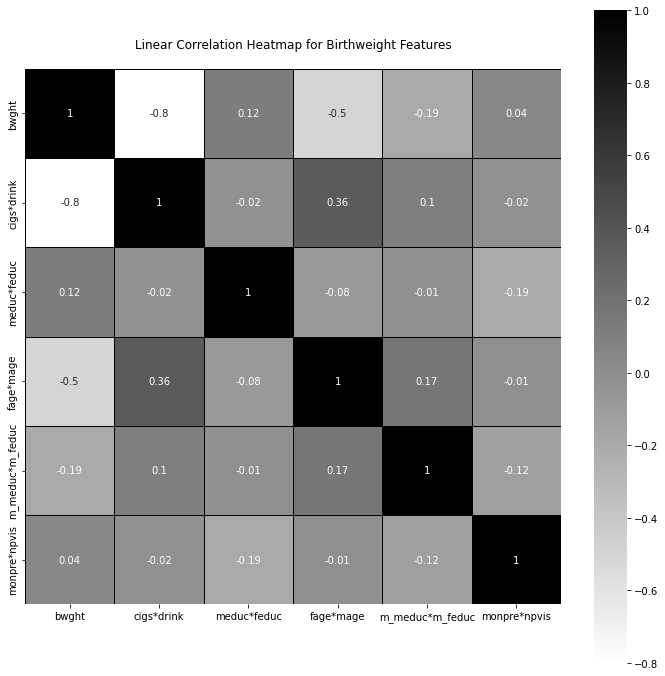

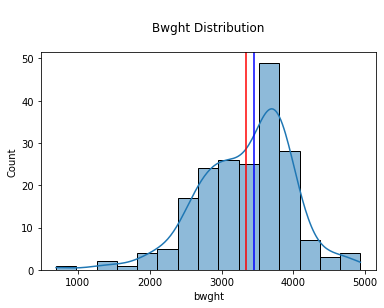

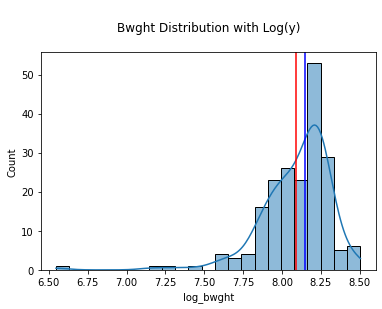

In [18]:
#correlation with more appealing visual
# specifying plot size 
fig, ax = plt.subplots(figsize=(12,12))


# developing a heatmap
sns.heatmap(data       = birthweight_corr, 
            cmap       = 'gray_r',     
            square     = True,          
            annot      = True,          
            linecolor  = 'black',       
            linewidths = 0.5)          


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for Birthweight Features
""")
plt.show()

# histogram for bwght (y_variable)
sns.histplot(data   = birthweight,
             x      = 'bwght',
             kde    = True)

#ddiding a mean and median line
plt.axvline(x = birthweight["bwght"].mean(),
           color ="red")
plt.axvline(x = birthweight["bwght"].median(),
           color ="blue")

# title and displaying the plot
plt.title("""
Bwght Distribution
""")
# rendering the plot
plt.show()

#creating logarithm value for bwght
birthweight['log_bwght'] = np.log(birthweight['bwght'])

# histogram for bwght (log(y)_variable)
sns.histplot(data   = birthweight,
             x      = 'log_bwght',
             kde    = True)

#ddiding a mean and median line
plt.axvline(x = birthweight["log_bwght"].mean(),
           color ="red")
plt.axvline(x = birthweight["log_bwght"].median(),
           color ="blue")

# title and displaying the plot
plt.title("""
Bwght Distribution with Log(y)
""")
# rendering the plot
plt.show()

Based on the birth weight bar chart above, we can see that the data are slighly skewed to the left with the original data.<br>
However, using the logarithm function makes the data even more skewed, so we will keep the original y variable for predictions.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Dealing with Skewed Data with Logarithm</h3> 

In [20]:
#creating a new dataframe with some dropped features
df_bwght = birthweight.drop(['omaps', 'fmaps', 'mblck','fwhte' ], axis = 1)

#Making a copy of df_bwght with specific columns
df_birthweight = df_bwght.loc[: ,['male', 'mwhte', 'moth', 'fblck', 'foth', 'bwght', 'm_npvis',
       'mv_sum', 'cigs*drink', 'meduc*feduc', 'fage*mage',
       'm_meduc*m_feduc', 'monpre*npvis']].copy()


In [21]:
#Renamming the crossed columns
df_birthweight['crossfading']= df_birthweight['cigs*drink']
df_birthweight['age']= df_birthweight['fage*mage']
df_birthweight['education']= df_birthweight['meduc*feduc']
df_birthweight['prenatal_care']= df_birthweight['monpre*npvis']
df_birthweight['m_education']= df_birthweight['m_meduc*m_feduc']

#dropping old columns
df = df_birthweight.drop(['cigs*drink', 'meduc*feduc', 'fage*mage',
       'm_meduc*m_feduc', 'monpre*npvis'], axis = 1)

print(f"New dataframe columns to be used for OLS regression")
print(df.columns) #print new features of the dataframe


New dataframe columns to be used for OLS regression
Index(['male', 'mwhte', 'moth', 'fblck', 'foth', 'bwght', 'm_npvis', 'mv_sum',
       'crossfading', 'age', 'education', 'prenatal_care', 'm_education'],
      dtype='object')


In [22]:
#setting x-variables data using full dataset for Lasso and ARD regression models 
birthweight_data= birthweight.drop(['bwght', 'log_bwght'], axis = 1)


# setting explanatory variable data for OLS Regression model
OLS_data   = df.drop(["bwght"],
                               axis = 1)

#setting y_variables
birthweight_target = df.loc[ : , "bwght"]

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Features Engineering for prediction Optimization</h2> 

In [23]:
# splitting the data into training and testing sets 
#Training and testing datasets for OLS model
x_train, x_test, y_train, y_test = train_test_split(
            OLS_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

# Training and testing datasets for Lasso and ARD models
x_train_Full, x_test_Full, y_train_Full, y_test_Full = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


In [24]:
# checking the shapes of the datasets
print(f"""
OLS Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


OLS Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}

Lasso & ARD Training Data
-------------
X-side: {x_train_Full.shape}
y-side: {y_train_Full.shape}


Lasso & ARD Testing Data
------------
X-side: {x_test_Full.shape}
y-side: {y_test_Full.shape}
""")



OLS Training Data
-------------
X-side: (147, 12)
y-side: (147,)


OLS Testing Data
------------
X-side: (49, 12)
y-side: (49,)

Lasso & ARD Training Data
-------------
X-side: (147, 26)
y-side: (147,)


Lasso & ARD Testing Data
------------
X-side: (49, 26)
y-side: (49,)



In [25]:
# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)
# merging X_train and y_train so that they can be used in statsmodels
birthweight_test = pd.concat([x_test, y_test], axis = 1)
# merging X_train and y_train so that they can be used in statsmodels
birthweight_train_Full = pd.concat([x_train_Full, y_train_Full], axis = 1)
# merging X_train and y_train so that they can be used in statsmodels
birthweight_test_Full = pd.concat([x_test_Full, y_test_Full], axis = 1)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Predictive Modeling</h2> 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>I- Ordinary Least Squares Regression Model</h3> 

In [26]:
# OLS linear regression model 
print("OLS Regression Model")
#training set
print('*'*80)
print("training set")
print('*'*80)
lm_best = smf.ols(formula =  """bwght ~ 
crossfading +
age +
education +
prenatal_care 
""",
data = birthweight_train)
#fitting the model based on the data
results = lm_best.fit()


#Displaying the summary output
print(results.summary())

#testing set
print('*'*80)
print("testing set")
print('*'*80)
lm_best = smf.ols(formula =  """bwght ~ 
crossfading +
age +
education +
prenatal_care 
""",
data = birthweight_test)


#fitting the model based on the data
results = lm_best.fit()



# displaying summary output
print(results.summary())

#R-squared summary
lr_train_score = 0.72
lr_test_score = 0.687
lr_test_gap = 0.033

#displaying the results
print(f'OLS Training Score :{lr_train_score}')
print(f'OLS Testing Score  :{lr_test_score}') 

#displaying and saving the gap between training and testing
print(f'OLS Train-Test Gap :{lr_test_gap}')

OLS Regression Model
********************************************************************************
training set
********************************************************************************
                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     92.43
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.55e-38
Time:                        16:25:33   Log-Likelihood:                -1070.4
No. Observations:                 147   AIC:                             2151.
Df Residuals:                     142   BIC:                             2166.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
              

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>II- Lasso Regression Model</h3> 

In [27]:
# Lasso Regression model
print("Lasso Regression Model")

lasso_model = sklearn.linear_model.Lasso(alpha = 6.0,
                             normalize = True) 


# Fitting to the training data
lasso_fit = lasso_model.fit(x_train_Full, y_train_Full)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_Full)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_Full, y_train_Full).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_Full, y_test_Full).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_Full, y_train_Full).round(4) 
lasso_test_score  = lasso_model.score(x_test_Full, y_test_Full).round(4)   


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)


Lasso Regression Model
Lasso Training Score : 0.705
Lasso Testing Score  : 0.6556
Lasso Train-Test Gap : 0.0494


C:\Users\Probook G3\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>III- ARD Regression Model</h3> 

In [28]:
# ARD Regression Model
print("ARD Regression Model")

ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_Full, y_train_Full)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_Full)


print('Training Score:', ard_model.score(x_train_Full, y_train_Full).round(4))
print('Testing Score :',  ard_model.score(x_test_Full, y_test_Full).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_Full, y_train_Full).round(4)
ard_test_score  = ard_model.score(x_test_Full, y_test_Full).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)


ARD Regression Model
Training Score: 0.7559
Testing Score : 0.6115
ARD Train-Test Gap : 0.1444


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>IV- KNN Regression Model</h3> 

In [29]:
print("Knn Regression Model")
#KNN Regression Model

scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(birthweight_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(birthweight_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_Full, y_train_Full)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_Full, y_train_Full))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_Full, y_test_Full))
    
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 9)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train_Full, y_train_Full)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test_Full)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train_Full, y_train_Full).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test_Full, y_test_Full).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_Full, y_train_Full).round(4)
knn_reg_score_test  = knn_reg.score(x_test_Full, y_test_Full).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)
    

Knn Regression Model
The optimal number of neighbors is 9
KNN Training Score: 0.565
KNN Testing Score : 0.3121
KNN Train-Test Gap: 0.2529


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>V- Final Results</h3> 

In [30]:
# comparing results of all used models

print(f"""
Model    Train Score        Test Score             Train_Test Gap    
-----    -----------        ----------             --------------
***OLS     {lr_train_score}               {lr_test_score}                 {lr_test_gap}  Final Model
Lasso      {lasso_train_score}              {lasso_test_score}                {lasso_test_gap}
ARD        {ard_train_score}             {ard_test_score}                {ard_test_gap}
KNN        {knn_reg_score_train}              {knn_reg_score_test}                {knn_reg_test_gap}
""")


Model    Train Score        Test Score             Train_Test Gap    
-----    -----------        ----------             --------------
***OLS     0.72               0.687                 0.033  Final Model
Lasso      0.705              0.6556                0.0494
ARD        0.7559             0.6115                0.1444
KNN        0.565              0.3121                0.2529

